In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

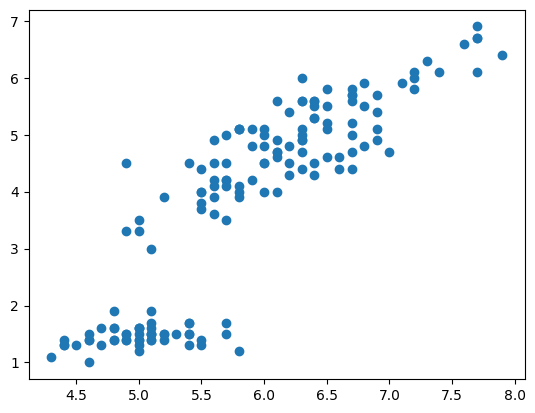

In [15]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[["sepal length (cm)"]] 
Y = df["petal length (cm)"]  

plt.scatter(X, Y)


In [14]:
def loss_function(m, b, X, Y):
    total_error = 0
    n = len(X)
    for i in range(n):
        x = X.iloc[i, 0]
        y = Y.iloc[i]
        total_error += (y - (m * x + b)) ** 2

    return total_error / n

In [16]:
import numpy as np

class LinearRegression:

    def __init__(self, L=0.01, n_iters=10000):
        self.L = L  # Learning rate 
        self.n_iters = n_iters
        self.m_now = None  # Weights 
        self.b_now = None  # Bias 

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.m_now = np.zeros(n_features)
        self.b_now = 0

        for _ in range(self.n_iters):
            #y = X * m_now + b_now
            linear_model = np.dot(X, self.m_now) + self.b_now
            y_predcited = linear_model 

            # Gradient of MSE loss function for weights and bias
            m_gradient = -(2 / n_samples) * np.dot(X.T, (Y - y_predcited)) 
            b_gradient = -(2 / n_samples) * np.sum(Y - y_predcited) 

            # Aktualizacja parametrów
            self.m_now -= self.L * m_gradient
            self.b_now -= self.L * b_gradient

    def predict(self, X):
        #y = X * m_now + b_now
        linear_model = np.dot(X, self.m_now) + self.b_now
        return linear_model 



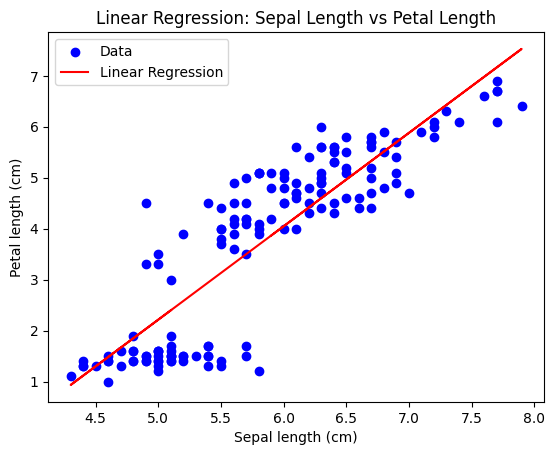

In [17]:
model = LinearRegression()
model.fit(X, Y)
m = model.m_now[0] 
b = model.b_now  

plt.scatter(X, Y, color="blue", label="Data")
plt.plot(X, m * X + b, color="red", label="Linear Regression")  
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.title("Linear Regression: Sepal Length vs Petal Length")
plt.legend()
plt.show()



Own model: m = 1.831493874976002, b = -6.940976777028802
sklearn: m = 1.8584329782548412, b = -7.101443369602455


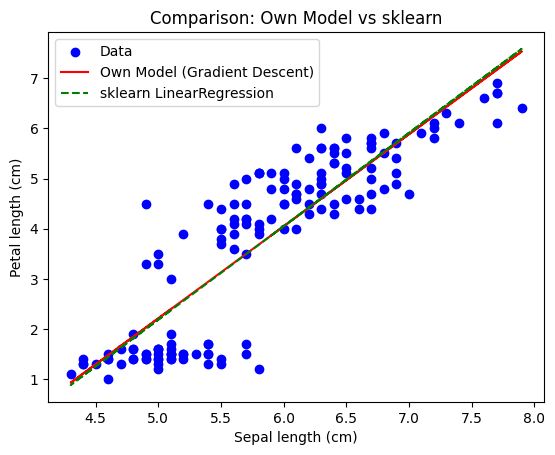

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_reshaped = X.values.reshape(-1, 1) 
model.fit(X_reshaped, Y)

print(f"Own model: m = {m}, b = {b}")
print(f"sklearn: m = {model.coef_[0]}, b = {model.intercept_}")

plt.scatter(X, Y, color="blue", label="Data")
plt.plot(X, m * X + b, color="red", label="Own Model (Gradient Descent)")
plt.plot(X, model.predict(X_reshaped), color="green", linestyle="--", label="sklearn LinearRegression")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.title("Comparison: Own Model vs sklearn")
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error


y_pred_custom = m * X.values + b
y_pred_sklearn = model.predict(X_reshaped)

mse_custom = mean_squared_error(Y, y_pred_custom)
mse_sklearn = mean_squared_error(Y, y_pred_sklearn)

print(f"Mean Squared Error (own model): {mse_custom}")
print(f"Mean Squared Error (sklearn): {mse_sklearn}")


Mean Squared Error (own model): 1.2181485837851938
Mean Squared Error (sklearn): 0.7430610341321241
